Index(['Customer', 'Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)',
       'Payment (Rs)', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Candy', 'Mango', 'Milk'],
      dtype='object')
This is C [[386]
 [289]
 [393]
 [110]
 [280]
 [167]
 [271]
 [274]
 [148]
 [198]]
[[-0.01008596 -0.03124505  0.01013951  0.0290728   0.0182907   0.01161794
  -0.00771348  0.00095458  0.01743623 -0.00542016]
 [ 0.09059668  0.07263726  0.03172933 -0.09071908 -0.01893196 -0.06926996
   0.05675464  0.03152577 -0.07641966  0.00357352]
 [ 0.00299878  0.15874243 -0.05795468 -0.06609024 -0.06295043  0.03348017
   0.01541831 -0.01070461  0.00029003  0.05938755]]
Dimensionality of the vector space: 3
Number of vectors in the vector space: 10
Rank of matrix A: 3
Estimated cost of each product [Candy, Mango, Milk]:
[ 1. 55. 18.]
Logistic

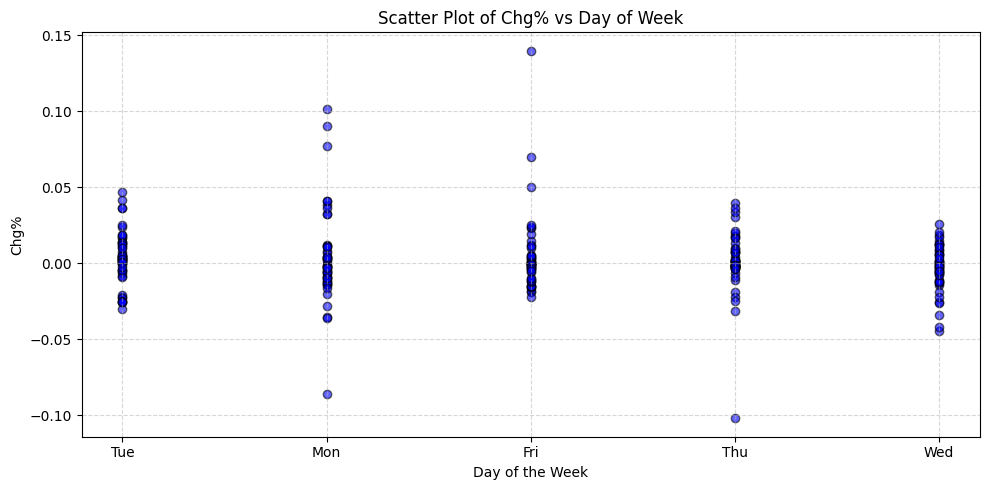

===== A3 Results =====
Mean of Price: 1560.6635
Variance of Price: 58732.3654
Mean Price on Wednesday: 1550.7060
Mean Price in April: 1698.9526
Probability of Loss: 0.4980
P(Profit ∩ Day=Wed): 0.1694
P(Profit | Day=Wed): 0.4200
             Price         Open         High          Low        Chg%
count   249.000000   249.000000   249.000000   249.000000  249.000000
mean   1560.663454  1560.965462  1586.130522  1538.742771    0.001964
std     242.347613   242.585896   249.859549   234.033719    0.022488
min    1300.550000  1292.850000  1308.800000  1290.050000   -0.102000
25%    1366.500000  1366.000000  1379.800000  1350.150000   -0.006400
50%    1438.250000  1440.000000  1461.850000  1422.050000    0.000000
75%    1747.400000  1735.500000  1774.000000  1715.000000    0.009100
max    2144.850000  2160.000000  2184.000000  2122.000000    0.139700
58732.36535253918
Average Price for Wednedays: 1550.7060000000001
Average Price for April: 1698.9526315789474
0.4979919678714859
50
50
       

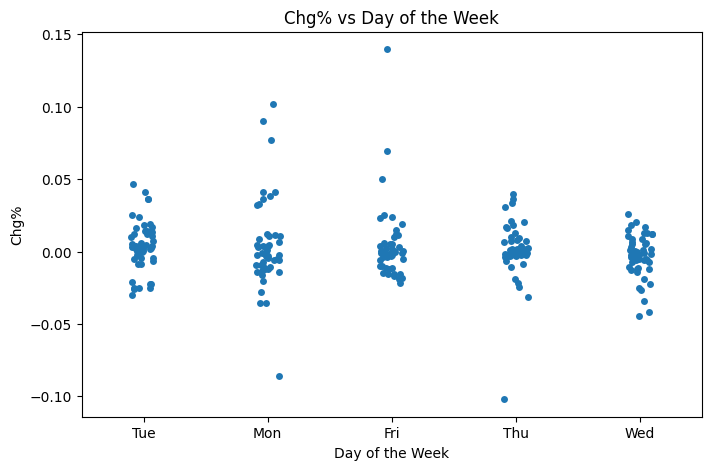

Column Names: ['Record ID', 'age', 'sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH', 'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U', 'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source', 'Condition']

Sample Rows:
      Record ID  age sex on thyroxine query on thyroxine  \
241   840903009   76   F            f                  f   
8284  861027056   34   ?            f                  f   
791   841016032   51   M            f                  f   
8562  861119044   36   F            f                  f   
4727  851017046   24   F            f                  f   

     on antithyroid medication sick pregnant thyroid surgery I131 treatment  \
241                          f    f        f               f              f   
8284                         f    

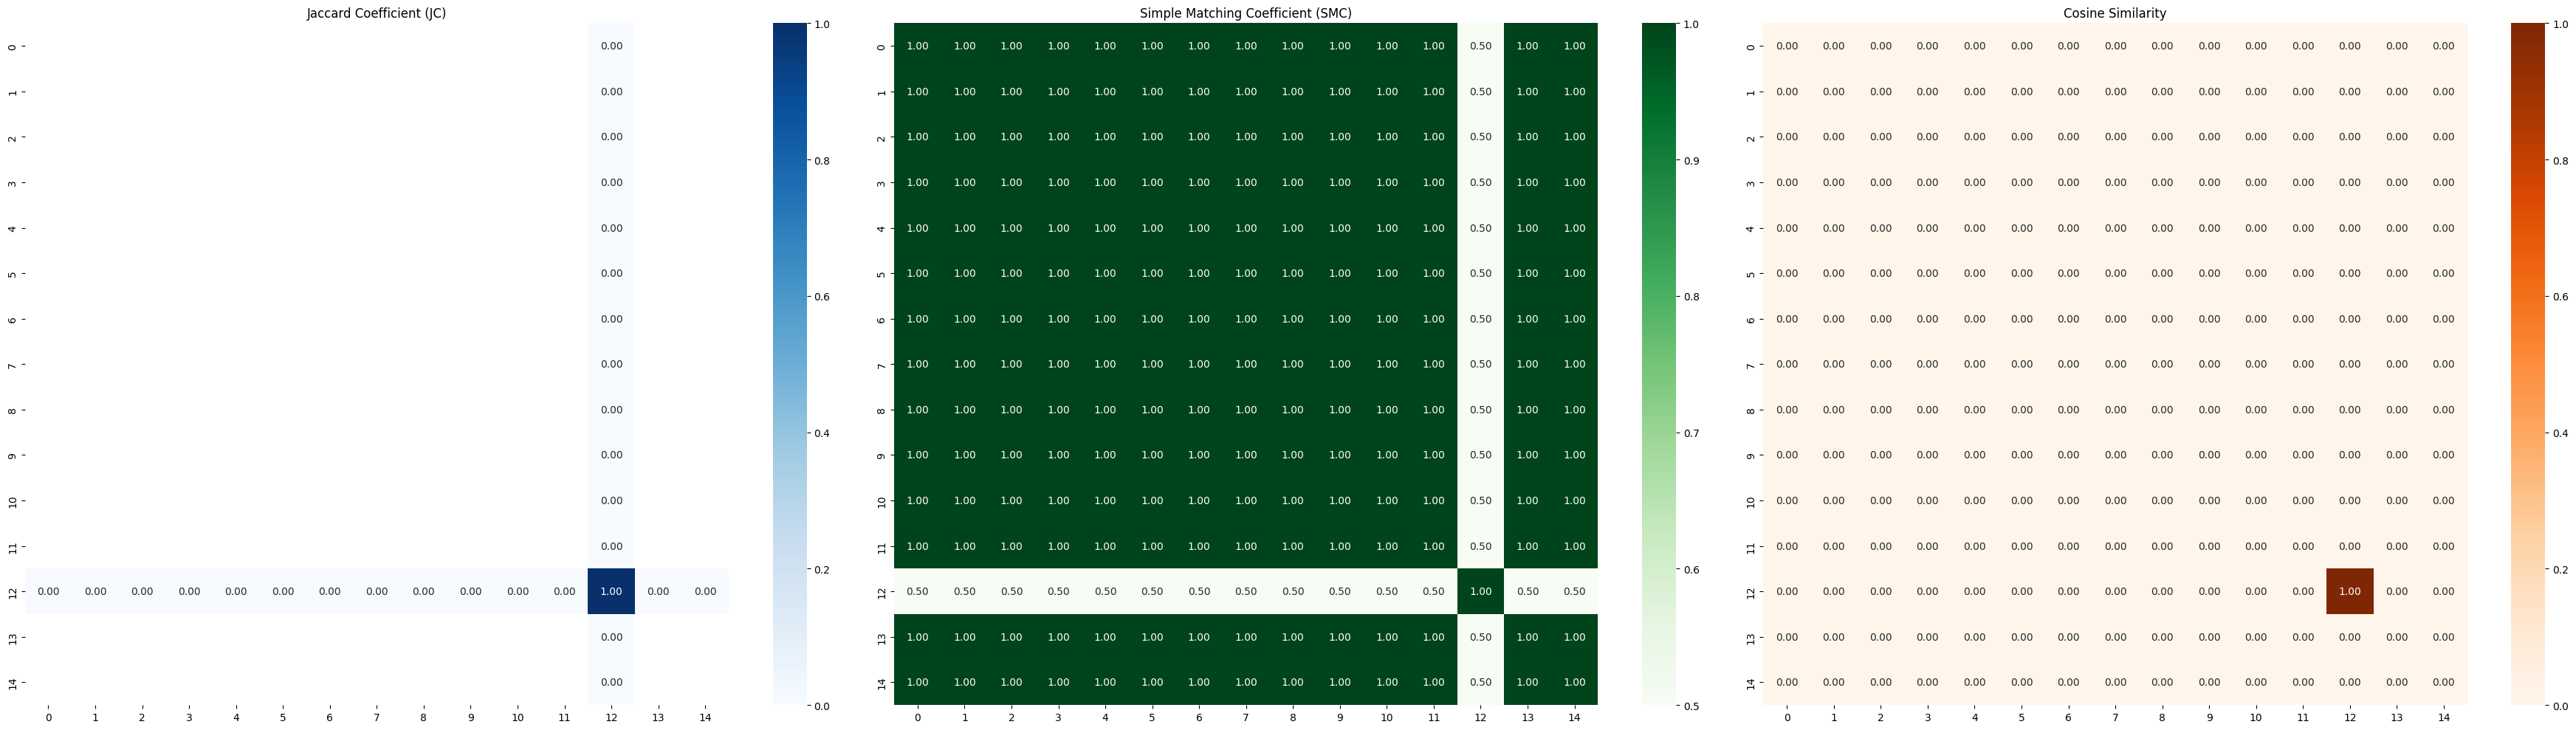


===== A8 Results =====
Missing values remaining after imputation:
0  total missing values.
Imputed Data Sample:
   Record ID   age sex on thyroxine query on thyroxine  \
0  840801013  29.0   F            f                  f   
1  840801014  29.0   F            f                  f   
2  840801042  41.0   F            f                  f   
3  840803046  36.0   F            f                  f   
4  840803047  32.0   F            f                  f   

  on antithyroid medication sick pregnant thyroid surgery I131 treatment  ...  \
0                         f    f        f               f              f  ...   
1                         f    f        f               f              f  ...   
2                         f    f        f               f              f  ...   
3                         f    f        f               f              f  ...   
4                         f    f        f               f              f  ...   

  TT4 measured         TT4 T4U measured       T4U F

In [1]:
## Question 1 


# Please refer to the “Purchase Data” worksheet of Lab Session Data.xlsx. Please load the data 
# and segregate them into 2 matrices A & C (following the nomenclature of AX = C). Do the following 
# activities. 

# • What is the dimensionality of the vector space for this data? 

# • How many vectors exist in this vector space? 

# • What is the rank of Matrix A? 

# • Using Pseudo-Inverse find the cost of each product available for sale.  

# (Suggestion: If you use Python, you can use numpy.linalg.pinv() function to get a 
# pseudo-inverse.)
import pandas as pd
import numpy as np

def load_purchase_data(path):
    df = pd.read_excel(path, sheet_name="Purchase data")
    print(df.columns) # printing to see spurious cols
    df = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)', 'Payment (Rs)']] # selecting the main classes in the excel sheet. 
    df = df.dropna() # to remove the na or invalid values. it removes the row
    return df

def get_matrix_properties(df):
    A = df.iloc[:, :-1].values #its grabbing all rows and colums except the last payment column 

    C = df.iloc[:, -1].values.reshape(-1, 1) # .values gives it as a column vector, .reshape changes it to a column vactor. 
    print("This is C",C)
    dimension = A.shape[1] # rows
    num_vectors = A.shape[0] # columns

    #shape returns the matrix as a tuple of rows and columns, 0 gets rows, 1 gets columns 

    rank = np.linalg.matrix_rank(A) # rank gives the number of linearly independent rows and columns
    return A, C, dimension, num_vectors, rank

def estimate_costs(A, C):
    print(np.linalg.pinv(A))
    X = np.linalg.pinv(A) @ C #linalg.pinv is used to find the pseudoinverse. X = A^-1.C
    return X 

file_path = 'Lab Session Data.xlsx' 
df_purchase = load_purchase_data(file_path)


A, C, dimension, num_vectors, rank = get_matrix_properties(df_purchase)


product_costs = estimate_costs(A, C)

#outputs: 
print("Dimensionality of the vector space:", dimension)
print("Number of vectors in the vector space:", num_vectors)
print("Rank of matrix A:", rank)
print("Estimated cost of each product [Candy, Mango, Milk]:") 
print(product_costs.flatten())

## Question 2

# Mark all customers (in “Purchase Data” table) with payments above Rs. 200 as RICH and others 
# as POOR. Develop a classifier model to categorize customers into RICH or POOR class based on 
# purchase behavior.
#importing everything

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def tag_rich_poor(df):
    df['Label'] = df['Payment (Rs)'].apply(lambda x: 1 if x > 200 else 0) # changes payment labels to 1 if its above 200, else it changes to 0
    return df # returns the changed dataset 

def train_rich_poor_classifier(df):
    X = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']] # grabs only the important columns 
    y = df['Label'] # grabbing the new column from the defined df 
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) #it fixes the seeed such that the test train split doesnt change everytime its run
    model = LogisticRegression()
    model.fit(X_train, y_train) 
    preds = model.predict(X_test)  # doing
    accuracy = accuracy_score(y_test, preds)
    return model, accuracy #calculates the difference and prediction values based on how well the model predicts. 



file_path = "Lab Session Data.xlsx" 


df_purchase = pd.read_excel(file_path, sheet_name="Purchase data")
df_purchase = df_purchase[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)', 'Payment (Rs)']].dropna() # to clean and drop the invalid values if any
 

df_labeled = tag_rich_poor(df_purchase) # creating the 1 for 200 and 0 for those below 200


model, accuracy = train_rich_poor_classifier(df_labeled) # trains on the basis of the new data/


print("Logistic Regression Model trained to classify RICH/POOR customers")
print(f"Accuracy on test set: {accuracy:.4f}")
## Question 3 


#  Please refer to the data present in “IRCTC Stock Price” data sheet of the above excel file. Do the 
# following after loading the data to your programming platform. 
# • Calculate the mean and variance of the Price data present in column D.  
# (Suggestion: if you use Python, you may use statistics.mean() & 
# statistics.variance() methods). 
# • Select the price data for all Wednesdays and calculate the sample mean. Compare the mean 
# with the population mean and note your observations. 
# • Select the price data for the month of Apr and calculate the sample mean. Compare the 
# mean with the population mean and note your observations. 
# • From the Chg% (available in column I) find the probability of making a loss over the stock. 
# (Suggestion: use lambda function to find negative values) 
# • Calculate the probability of making a profit on Wednesday. 
# • Calculate the conditional probability of making profit, given that today is Wednesday. 
# • Make a scatter plot of Chg% data against the day of the week
import pandas as pd
import statistics
import matplotlib.pyplot as plt

def load_irctc_data(file_path):
    """Load IRCTC stock data from Excel."""
    df = pd.read_excel(file_path, sheet_name='IRCTC Stock Price')
    df.dropna(subset=['Price', 'Day', 'Month', 'Chg%'], inplace=True)
    return df

def compute_mean_and_variance(price_series):
    """Return mean and variance of a price series."""
    mean_price = statistics.mean(price_series)
    var_price = statistics.variance(price_series)
    return mean_price, var_price

def calculate_day_mean(df, target_day):
    """Calculate mean Price on a specific day (e.g., Wednesday)."""
    filtered = df[df['Day'] == target_day]['Price']
    return statistics.mean(filtered)

def calculate_month_mean(df, target_month):
    """Calculate mean Price for a specific month (e.g., Apr)."""
    filtered = df[df['Month'] == target_month]['Price']
    return statistics.mean(filtered)

def calculate_loss_probability(df):
    """Calculate probability of making a loss (Chg% < 0)."""
    losses = df[df['Chg%'] < 0]
    return len(losses) / len(df)

def calculate_profit_on_day_probability(df, target_day):
    """Calculate unconditional probability of profit happening on a specific day."""
    day_wise_profit = df[(df['Day'] == target_day) & (df['Chg%'] > 0)]
    total_profits = df[df['Chg%'] > 0]
    return len(day_wise_profit) / len(total_profits)

def calculate_conditional_profit_given_day(df, target_day):
    """Calculate P(profit | given that it's a target day)."""
    is_wed = df[df['Day'] == target_day]
    wed_profits = is_wed[is_wed['Chg%'] > 0]
    return len(wed_profits) / len(is_wed)

def plot_change_vs_day(df):
    """Scatter plot of Chg% against day of the week."""
    plt.figure(figsize=(10, 5))
    plt.scatter(df['Day'], df['Chg%'], alpha=0.6, edgecolor='black', color='blue')
    plt.title("Scatter Plot of Chg% vs Day of Week")
    plt.xlabel("Day of the Week")
    plt.ylabel("Chg%")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


path = "Lab Session Data.xlsx"  

irctc_df = load_irctc_data(path)

# Task 1: Mean and Variance
mean_price, var_price = compute_mean_and_variance(irctc_df['Price'])

# Task 2: Wednesday mean price
wed_mean = calculate_day_mean(irctc_df, 'Wed')

# Task 3: April mean price
apr_mean = calculate_month_mean(irctc_df, 'Apr')

# Task 4: Probability of loss
prob_loss = calculate_loss_probability(irctc_df)

# Task 5: P(profit on Wednesday) out of all profit days
prob_profit_on_wed = calculate_profit_on_day_probability(irctc_df, 'Wed')

# Task 6: P(profit | Wednesday)
cond_prob_profit_given_wed = calculate_conditional_profit_given_day(irctc_df, 'Wed')

# Task 7: Scatter plot
plot_change_vs_day(irctc_df)

# Display Results
print("===== A3 Results =====")
print(f"Mean of Price: {mean_price:.4f}")
print(f"Variance of Price: {var_price:.4f}")

print(f"Mean Price on Wednesday: {wed_mean:.4f}")
print(f"Mean Price in April: {apr_mean:.4f}")

print(f"Probability of Loss: {prob_loss:.4f}")
print(f"P(Profit ∩ Day=Wed): {prob_profit_on_wed:.4f}")
print(f"P(Profit | Day=Wed): {cond_prob_profit_given_wed:.4f}")

### Question 3

import pandas as pd
import numpy as np
df = pd.read_excel("Lab Session Data.xlsx", sheet_name="IRCTC Stock Price")


print(df.describe())
print(df['Price'].var())
filtered_df = df[df['Day'] == 'Wed']
filtered_priced = filtered_df['Price']
print("Average Price for Wednedays:",filtered_priced.mean()) 
df = pd.read_excel("Lab Session Data.xlsx", sheet_name="IRCTC Stock Price")

filtered_df = df[df['Month'] == 'Apr']
filtered_priced = filtered_df['Price']
print("Average Price for April:",filtered_priced.mean())

losses = df['Chg%'].apply(lambda x: x < 0)

# probability of loss
print(losses.mean())

#loss on wednesday
filtered_df = df[df['Day'] == 'Wed']
wed_loss = filtered_df['Chg%'].apply(lambda x: x >= 0.00)
print(len(wed_loss))
print(len(filtered_df))
#Conditional Probability 
filtered_df = df[df['Chg%'].apply(lambda x: x < 0)]
filtered_cond_prob = filtered_df[filtered_df['Day'] == "Wed"]
print(filtered_cond_prob)

# Assuming df is already loaded
# 1. Filter Wednesdays
wed_df = df[df['Day'] == 'Wed']

# 2. Count profitable Wednesdays
wed_profit = wed_df[wed_df['Chg%'] > 0]

# 3. Calculate probability
prob_profit_wed = len(wed_profit) / len(wed_df)
print(f"HERE IS THE ANSQER {prob_profit_wed}")

#4. Scatter Plot
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
sns.stripplot(x='Day', y='Chg%', data=df, jitter=True)
plt.title('Chg% vs Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Chg%')
plt.show()
# Question 4 

# Data Exploration: Load the data available in “thyroid0387_UCI” worksheet. Perform the 
# following tasks: 
# • Study each attribute and associated values present. Identify the datatype (nominal etc.) 
# for the attribute. 
# • For categorical attributes, identify the encoding scheme to be employed. (Guidance: 
# employ label encoding for ordinal variables while One-Hot encoding may be employed 
# for nominal variables). 
# • Study the data range for numeric variables. 
# • Study the presence of missing values in each attribute. 
# • Study presence of outliers in data.  
# • For numeric variables, calculate the mean and variance (or standard deviation). 
import pandas as pd
import numpy as np
from scipy import stats
import warnings

warnings.filterwarnings('ignore')  # Suppress warnings for clean output

# --- Function Definitions ---

def load_data(filepath, sheet_name):
    """Load Excel sheet into DataFrame."""
    return pd.read_excel(filepath, sheet_name=sheet_name)


def get_column_types():
    """Return predefined nominal, ordinal, and numeric column names."""
    nominal_cols = [
        'Record ID', 'sex', 'on thyroxine', 'query on thyroxine',
        'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
        'I131 treatment', 'query hypothyroid', 'query hyperthyroid',
        'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych',
        'referral source', 'Condition'
    ]

    ordinal_cols = [
        'TSH measured', 'T3 measured', 'TT4 measured',
        'T4U measured', 'FTI measured', 'TBG measured'
    ]

    numeric_cols = [
        'age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG'
    ]

    return nominal_cols, ordinal_cols, numeric_cols


def clean_numeric_columns(df, numeric_cols):
    """Convert numeric columns to float and replace '?' with NaN."""
    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    return df


def get_numeric_ranges(df, numeric_cols):
    """Return dictionary of data ranges for numeric columns."""
    ranges = {}
    for col in numeric_cols:
        if df[col].isnull().all():
            ranges[col] = np.nan
        else:
            ranges[col] = df[col].max() - df[col].min()
    return ranges


def detect_outliers(df, numeric_cols, threshold=3):
    """Return rows where any numeric column has z-score >= threshold."""
    numeric_data = df[numeric_cols]
    z_scores = np.abs(stats.zscore(numeric_data, nan_policy='omit'))
    return df[(z_scores >= threshold).any(axis=1)]


def get_statistics(df, numeric_cols):
    """Return mean, variance, and std dev of numeric columns as DataFrames."""
    mean = df[numeric_cols].mean()
    var = df[numeric_cols].var()
    std = df[numeric_cols].std()
    return mean, var, std

# --- Main Program ---

# 1. Load data
df = load_data("Lab Session Data.xlsx", sheet_name="thyroid0387_UCI")

# 2. Column type metadata
nominal_cols, ordinal_cols, numeric_cols = get_column_types()

# Display columns and samples
print("Column Names:", df.columns.tolist())
print("\nSample Rows:")
print(df.sample(5))

# 3. Show data types
print("\nData Types:")
print(df.dtypes)

# 4. Display column type groupings
print("\n--- Nominal Columns ---")
print(nominal_cols)

print("\n--- Ordinal Columns ---")
print(ordinal_cols)

print("\n--- Numeric Columns ---")
print(numeric_cols)

# 5. Clean & convert numeric columns
df = clean_numeric_columns(df, numeric_cols)

# 6. Display ranges
print("\n--- Data Ranges for Numeric Columns ---")
numeric_ranges = get_numeric_ranges(df, numeric_cols)
for col, rng in numeric_ranges.items():
    print(f"{col}: {rng}")

# 7. Outlier detection
outliers_df = detect_outliers(df, numeric_cols)
print(f"\nRows with outliers in numeric columns: {len(outliers_df)}")
print(outliers_df)

# 8. Mean, variance, and std deviation
mean_vals, var_vals, std_vals = get_statistics(df, numeric_cols)

print("\n--- Mean of Numeric Columns ---")
print(mean_vals)

print("\n--- Variance of Numeric Columns ---")
print(var_vals)

print("\n--- Standard Deviation of Numeric Columns ---")
print(std_vals)

## Question 5 

# Similarity Measure: Take the first 2 observation vectors from the dataset. Consider only the 
# attributes (direct or derived) with binary values for these vectors (ignore other attributes). Calculate 
# the Jaccard Coefficient (JC) and Simple Matching Coefficient (SMC) between the document vectors. 
# Use first vector for each document for this. Compare the values for JC and SMC and judge the 
# appropriateness of each of them. 
import pandas as pd
import numpy as np
from sklearn.metrics import jaccard_score



def get_binary_columns(df):
    """
    Identify all binary columns in the dataframe 
    where values are 'f'/'t' or 0/1.
    Returns a list of column names.
    """
    binary_cols = [
        col for col in df.columns
        if set(df[col].dropna().unique()).issubset({'f', 't', 0, 1})
    ]
    return binary_cols


def convert_to_binary(df, binary_cols):
    """
    Replace 'f' with 0 and 't' with 1 for binary computation.
    Returns new dataframe with binary representation.
    """
    return df[binary_cols].replace({'f': 0, 't': 1})


def calculate_jaccard(v1, v2):
    """
    Calculate Jaccard coefficient between two binary vectors.
    """
    return jaccard_score(v1, v2)


def calculate_smc(v1, v2):
    """
    Calculate Simple Matching Coefficient (SMC) between two binary vectors.
    """
    f11 = np.sum((v1 == 1) & (v2 == 1))
    f00 = np.sum((v1 == 0) & (v2 == 0))
    f10 = np.sum((v1 == 1) & (v2 == 0))
    f01 = np.sum((v1 == 0) & (v2 == 1))
    total = f00 + f01 + f10 + f11
    return (f11 + f00) / total if total != 0 else np.nan

df = pd.read_excel("Lab Session Data.xlsx", sheet_name="thyroid0387_UCI")


binary_columns = get_binary_columns(df)


df_binary = convert_to_binary(df, binary_columns)

# Extract first two binary vectors (rows)
v1 = df_binary.iloc[0].values
v2 = df_binary.iloc[1].values

# Calculate similarity measures
jaccard = calculate_jaccard(v1, v2)
smc = calculate_smc(v1, v2)
print("Jaccard Coefficient (JC):", round(jaccard, 4))
print("Simple Matching Coefficient (SMC):", round(smc, 4))
# ## Question 6
# Cosine Similarity Measure: Now take the complete vectors for these two observations (including 
# all the attributes). Calculate the Cosine similarity between the documents by using the second 
# feature vector for each document.
# 11. Cosine Similarity Measure: Calculate cosine similarity between first two complete observation vectors


from sklearn.metrics.pairwise import cosine_similarity

# Prepare the data: convert all columns to numeric where possible, fill NaN with 0
df_numeric = df.apply(lambda col: pd.to_numeric(col.replace({'f': 0, 't': 1}), errors='coerce')).fillna(0)

# Take the first two complete vectors (including all attributes)
vec1 = df_numeric.iloc[0].values.reshape(1, -1)
vec2 = df_numeric.iloc[1].values.reshape(1, -1)

# Calculate cosine similarity
cos_sim = cosine_similarity(vec1, vec2)[0][0]

print("Cosine Similarity between first two observations:", cos_sim)
print("Cosine Similarity between first two observations:", cos_sim)
## Question - 7

# Heatmap Plot: Consider the first 20 observation vectors. Calculate the JC, SMC and COS between 
# the pairs of vectors for these 20 vectors. Employ similar strategies for coefficient calculation as in A4 
# & A5. Employ a heatmap plot to visualize the similarities.  
#  Suggestion to Python users → 


import seaborn as sns
excel = 'Lab Session Data.xlsx'
sheet = 'thyroid0387_UCI'
def get_data(excel,sheet):
    data = pd.read_excel(excel , sheet_name=sheet)
    return data

th_Data = get_data(excel,sheet)

def f_counts(row1, row2):
    f11 = ((row1 == 1) & (row2 == 1)).sum()
    f00 = ((row1 == 0) & (row2 == 0)).sum()
    f10 = ((row1 == 1) & (row2 == 0)).sum()
    f01 = ((row1 == 0) & (row2 == 1)).sum()
    return f11, f00, f10, f01

def jc(v1, v2):
    f11 = sum((a == 1 and b == 1) for a, b in zip(v1, v2))
    f10 = sum((a == 1 and b == 0) for a, b in zip(v1, v2))
    f01 = sum((a == 0 and b == 1) for a, b in zip(v1, v2))
    denom = f11 + f10 + f01
    if denom == 0:
        return np.nan  # or you could return np.nan or -1, depending on your needs
    return f11 / denom

def smc(row1, row2):
    f11, f00, f10, f01 = f_counts(row1, row2)
    denom = f00 + f01 + f10 + f11
    return (f11 + f00) / denom if denom else float('nan')

def cosine(row1, row2):
    dot = (row1 * row2).sum()
    norm1 = (row1 ** 2).sum() ** 0.5
    norm2 = (row2 ** 2).sum() ** 0.5
    return dot / (norm1 * norm2) if norm1 and norm2 else 0
range1 = 15

selected_cols = ["on thyroxine", "query on thyroxine"]

binary_columns = [col for col in selected_cols 
                  if set(th_Data[col].dropna().unique()) <= {'t', 'f', 0, 1}]
binary_df = th_Data[binary_columns].replace({'t': 1, 'f': 0}).astype(int).iloc[:range1]

JC  = pd.DataFrame([[jc(binary_df.iloc[i], binary_df.iloc[j])   for j in range(range1)] for i in range(range1)])
SMC = pd.DataFrame([[smc(binary_df.iloc[i], binary_df.iloc[j])  for j in range(range1)] for i in range(range1)])
COS = pd.DataFrame([[cosine(binary_df.iloc[i], binary_df.iloc[j])  for j in range(range1)] for i in range(range1)])



plt.figure(figsize=(36, 10))

plt.subplot(1, 3, 1)
sns.heatmap(JC, annot=True, cmap='Blues', fmt='.2f')
plt.title('Jaccard Coefficient (JC)')

plt.subplot(1, 3, 2)
sns.heatmap(SMC, annot=True, cmap='Greens', fmt='.2f')
plt.title('Simple Matching Coefficient (SMC)')

plt.subplot(1, 3, 3)
sns.heatmap(COS, annot=True, cmap='Oranges', fmt='.2f')
plt.title('Cosine Similarity')

plt.tight_layout()
plt.show()
## Question 8

# Data Imputation: employ appropriate central tendencies to fill the missing values in the data 
# variables. Employ following guidance. 
# • Mean may be used when the attribute is numeric with no outliers 
# • Median may be employed for attributes which are numeric and contain outliers 
# • Mode may be employed for categorical attributes 

def impute_thyroid_data(df, numeric_cols, categorical_cols):
    df = df.copy()

    # Impute numeric columns based on outliers
    for col in numeric_cols:
        values = pd.to_numeric(df[col], errors='coerce')
        zscores = np.abs(stats.zscore(values.dropna()))
        if len(zscores) > 0 and (zscores > 3).any():
            df[col] = values.fillna(values.median())
        else:
            df[col] = values.fillna(values.mean())

    # Impute categorical columns using mode
    for col in categorical_cols:
        if df[col].isna().sum() > 0:
            df[col] = df[col].fillna(df[col].mode().iloc[0])
    
    return df
# Treat nominal columns as categorical for imputation
df_thyroid_imputed = impute_thyroid_data(df, numeric_cols, nominal_cols)

# Check remaining missing values
print("\n===== A8 Results =====")
print("Missing values remaining after imputation:")
print(df_thyroid_imputed.isna().sum().sum(), " total missing values.")

## Question 9
# Data Normalization / Scaling: from the data study, identify the attributes which may need 
# normalization. Employ appropriate normalization techniques to create normalized set of data.
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Replace '?' with NaN in numeric columns
df[numeric_cols] = df[numeric_cols].replace("?", np.nan)

# Convert numeric columns to float (so imputer can calculate mean)
df[numeric_cols] = df[numeric_cols].astype(float)

# Impute missing values (mean for numeric)
imputer = SimpleImputer(strategy="mean")
df_imputed = df.copy()
df_imputed[numeric_cols] = imputer.fit_transform(df[numeric_cols])

## Question 9
# Data Normalization / Scaling: from the data study, identify the attributes which may need 
# normalization. Employ appropriate normalization techniques to create normalized set of data.
def normalize_data(df, cols, method='minmax'):
    """
    Normalize or scale data for specified columns.
    method: 'minmax' for MinMaxScaler, 'zscore' for StandardScaler
    """
    df_norm = df.copy()
    if method == 'minmax':
        scaler = MinMaxScaler()
    elif method == 'zscore':
        scaler = StandardScaler()
    else:
        raise ValueError("method must be 'minmax' or 'zscore'")
    df_norm[cols] = scaler.fit_transform(df_norm[cols])
    return df_norm

# Identify columns for normalization (numeric columns with wide range)
norm_cols = [col for col in numeric_cols if df_imputed[col].max() - df_imputed[col].min() > 1]
df_normalized = normalize_data(df_imputed, norm_cols, method='minmax')

print("Imputed Data Sample:")
print(df_imputed.head())
print("Normalized Data Sample:")
print(df_normalized[norm_cols].head())
